In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('C:/Users/skesh/Desktop/Data/Earthquakes.csv')
df

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


#### number of earthquakes by magnitude

In [5]:
df['Magnitude']

0        6.0
1        5.8
2        6.2
3        5.8
4        5.8
        ... 
23407    5.6
23408    5.5
23409    5.9
23410    6.3
23411    5.5
Name: Magnitude, Length: 23412, dtype: float64

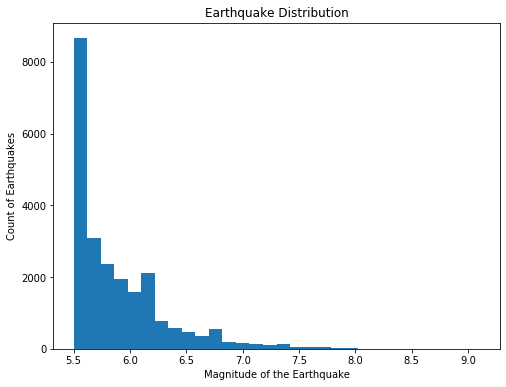

In [11]:
#Earthquake distribution
plt.figure(figsize=(8,6))

plt.hist(df['Magnitude'],bins = 30)
plt.xlabel("Magnitude of the Earthquake")
plt.ylabel("Count of Earthquakes")
plt.title("Earthquake Distribution")
plt.show()

#### year wise earthquake counts

In [39]:
df['new_date'] = pd.to_datetime(df['Date'], utc = True)
df[['new_date','Date']].head(4)

,new_date,Date
0,1965-01-02 00:00:00+00:00,01/02/1965
1,1965-01-04 00:00:00+00:00,01/04/1965
2,1965-01-05 00:00:00+00:00,01/05/1965
3,1965-01-08 00:00:00+00:00,01/08/1965


In [40]:
df['Year'] = df['new_date'].dt.year
df['Month'] = df['new_date'].dt.month

In [41]:
df['Year'].value_counts()

2011    713
2007    608
1995    591
2004    571
2010    560
2000    553
1996    541
1992    533
2005    533
1990    528
2009    517
2008    508
1994    508
2006    508
1987    505
1988    489
2003    485
1986    485
1984    482
1989    480
2014    480
1985    476
2016    469
1993    466
2013    461
1976    457
1997    456
1983    453
2015    446
1999    446
2012    445
2002    444
2001    443
1991    429
1977    425
1975    412
1978    410
1973    401
1972    388
1998    388
1971    386
1974    361
1979    356
1980    348
1982    346
1970    345
1965    339
1969    323
1981    321
1968    305
1967    255
1966    234
Name: Year, dtype: int64

In [42]:
years = df['Year'].value_counts().index
earthqks = df['Year'].value_counts().values

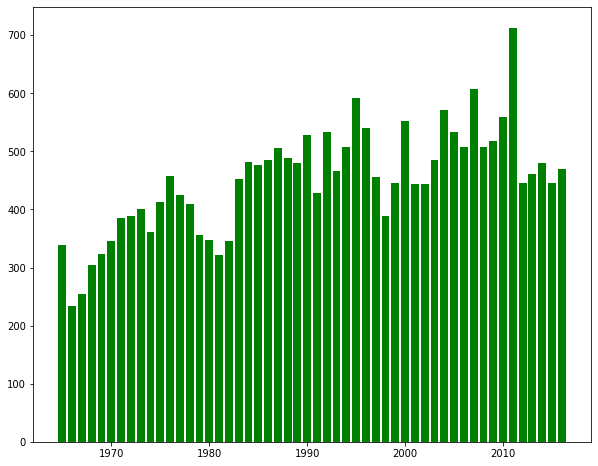

In [43]:
plt.figure(figsize=(10,8))

plt.bar(years,earthqks,color='green')
plt.show()

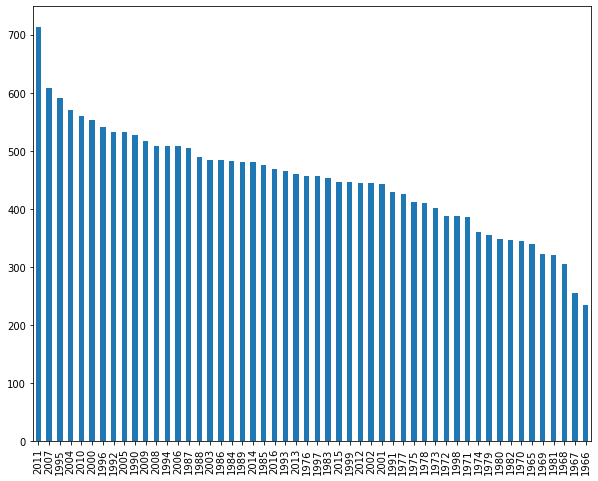

In [50]:
plt.figure(figsize=(10,8))

df['Year'].value_counts().plot(kind = 'bar')
plt.show()

In [57]:
lessthansix = df[df['Magnitude'] <= 6].shape[0]
greaterthansix = df[df['Magnitude'] > 6].shape[0]

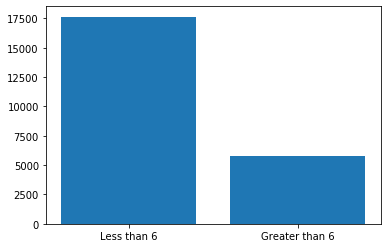

In [69]:
labels = ['Less than 6','Greater than 6']

l1 = [lessthansix,greaterthansix]

plt.bar(labels,l1)

plt.show()

#### Exploratary Data Analysis

In [70]:
df = pd.read_csv('https://raw.githubusercontent.com/Sreemanto/Python-Batch-Imarticus/main/Tarffic_Violation.csv')

In [71]:
df

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,NaN,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,NaN,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,NaN,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,NaN,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


#### 1. Find the column which has the highest null value and delete it

In [72]:
df.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [74]:
#option 1
df = df.drop(columns = 'county_name')

# Option 2
df.drop(columns = 'county_name',inplace=True)

#### 2. Who overspeed more? Men or Women?

In [77]:
df['violation'].unique()

array(['Speeding', 'Other', 'Equipment', 'Moving violation', nan,
       'Registration/plates', 'Seat belt'], dtype=object)

In [78]:
#Step 1 - Filter for violation == speeding
#STep 2 - From the filtered df find the count of males and females

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [80]:
df[df['violation']=='Speeding']['driver_gender'].value_counts()

M    32979
F    15482
Name: driver_gender, dtype: int64

In [81]:
df['driver_gender'].value_counts()

M    62895
F    23511
Name: driver_gender, dtype: int64

#### When a man is pulled over. How often is it for overspeeding

In [83]:
df[df['driver_gender']=='M']['violation'].value_counts()

Speeding               32979
Moving violation       13020
Equipment               8533
Other                   3627
Registration/plates     2419
Seat belt               2317
Name: violation, dtype: int64

In [84]:
df[df['driver_gender']=='M']['violation'].value_counts(normalize=True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

#### When a woman is pulled over. How often is it for overspeeding

In [85]:
df[df['driver_gender']=='F']['violation'].value_counts(normalize=True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

#### Combining both the results in one line

In [88]:
df.groupby('driver_gender')['violation'].value_counts(normalize=True)

driver_gender  violation          
F              Speeding               0.658500
               Moving violation       0.136277
               Equipment              0.105780
               Registration/plates    0.043086
               Other                  0.029348
               Seat belt              0.027009
M              Speeding               0.524350
               Moving violation       0.207012
               Equipment              0.135671
               Other                  0.057668
               Registration/plates    0.038461
               Seat belt              0.036839
Name: violation, dtype: float64

#### 3. Does Gender or Race affects who is getting searched

In [90]:
df['search_conducted'].unique()

array([False,  True])

In [91]:
df['search_conducted'].value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [92]:
df['search_conducted'].value_counts(normalize=True)

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

In [93]:
df['search_conducted'].mean()

0.03483720473942948

In [94]:
df.groupby('driver_gender')['search_conducted'].mean()

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

In [95]:
df.groupby(['driver_gender','driver_race'])['search_conducted'].mean()

driver_gender  driver_race
F              Asian          0.011696
               Black          0.041473
               Hispanic       0.036879
               Other          0.000000
               White          0.015604
M              Asian          0.025773
               Black          0.070675
               Hispanic       0.067444
               Other          0.014019
               White          0.033895
Name: search_conducted, dtype: float64

#### 4. Which year had most number of violations

In [98]:
df.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [99]:
#option1 - slicing the first 4 characters
df['stop_date']

0        2005-01-02
1        2005-01-18
2        2005-01-23
3        2005-02-20
4        2005-03-14
            ...    
91736    2015-12-31
91737    2015-12-31
91738    2015-12-31
91739    2015-12-31
91740    2015-12-31
Name: stop_date, Length: 91741, dtype: object

In [101]:
df['year'] = df['stop_date'].str.slice(0,4)

In [102]:
df['year']

0        2005
1        2005
2        2005
3        2005
4        2005
         ... 
91736    2015
91737    2015
91738    2015
91739    2015
91740    2015
Name: year, Length: 91741, dtype: object

In [103]:
#option 2 - combining Date and Time to create a DateTime object

In [104]:
df[['stop_date','stop_time']].head(4)

,stop_date,stop_time
0,2005-01-02,01:55
1,2005-01-18,08:15
2,2005-01-23,23:15
3,2005-02-20,17:15


In [109]:
combined = df['stop_date'].str.cat(df['stop_time'],sep=' ')
combined

0        2005-01-02 01:55
1        2005-01-18 08:15
2        2005-01-23 23:15
3        2005-02-20 17:15
4        2005-03-14 10:00
               ...       
91736    2015-12-31 20:27
91737    2015-12-31 20:35
91738    2015-12-31 20:45
91739    2015-12-31 21:42
91740    2015-12-31 22:46
Name: stop_date, Length: 91741, dtype: object

In [110]:
df['stop_datetime'] = pd.to_datetime(combined)
df

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,year,stop_datetime
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,2005-01-02 01:55:00
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,2005-01-18 08:15:00
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,2005-01-23 23:15:00
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005,2005-02-20 17:15:00
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,2005-03-14 10:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False,2015,2015-12-31 20:27:00
91737,2015-12-31,20:35,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,2015,2015-12-31 20:35:00
91738,2015-12-31,20:45,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False,2015,2015-12-31 20:45:00
91739,2015-12-31,21:42,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2015,2015-12-31 21:42:00


In [111]:
df['Year'] = df['stop_datetime'].dt.year

In [117]:
df['Year'].value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: Year, dtype: int64

In [118]:
df['Year'].value_counts().index

Int64Index([2012, 2006, 2007, 2014, 2008, 2015, 2011, 2013, 2009, 2010, 2005], dtype='int64')

In [121]:
most_violation_year = df['Year'].value_counts().index[0]

In [120]:
least_violation_year = df['Year'].value_counts().index[-1]